# Linear regression

In [1]:
# initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Conceptual foundations of linear regression

Often times we are interested in how one variable depends on another. The simplest dependence of such kind is a linear relationship. However, because of measurement uncertainty and inherit variation in variables not captured by the dependency being studied, when we plot the data in scatter plot, they seldom fall onto a literal straight line.

As an example, suppose we measured the heights (in cm) and weights (in kg) of a number of male American adults, we may obtain a dataset like the following:

In [2]:
heights = np.array([
    160, 165, 164, 164, 171, 170, 156, 161, 164, 153
])

weights = np.array([
    66.8, 93.0, 94.7, 81.9, 101.8, 113.6, 53.3, 64.7, 83.5, 61.1
])

When we plot the heights against the weights, we get the following:

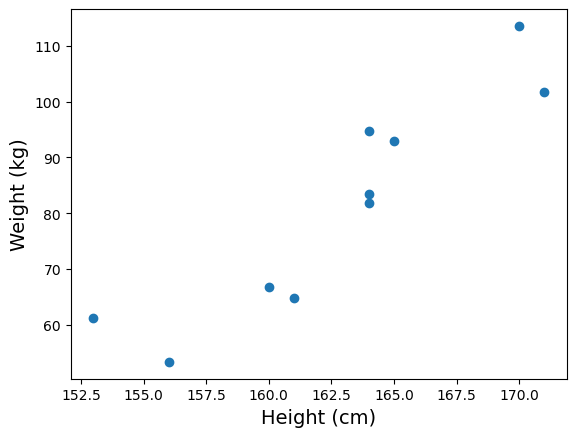

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(heights, weights)
ax.set_xlabel("Height (cm)", fontsize=14)
ax.set_ylabel("Weight (kg)", fontsize=14)

plt.show(fig)

Notice that while the measurements don't fall onto a literal straight line, there is a clear linear trend. So we may still want to associate the data with a "best fitted line". But how do we do that?

A common strategy in such situation is to find a straight line of the form $y = m x + c$ with slope $m$ and intercept $c$ such that the square error $\sum_i \left( y_i - (m x_i + c) \right)^2$ is minimized (here $(x_i, y_i)$ are the individual data points). The procedure to do so is known as linear regression.

As it turns out, the linear regression procedure outlined above corresponds to a particular *model* of the relationship between $x$ and $y$. The relationship is:

> At any given value of $x$, the variable $y$ is distributed as a Gaussian (a.k.a. normal) distribution with mean $m x + c$ and standard deviation $\sigma$, where $\sigma$ is the same across all values of $x$

In applying linear regression, it is important to check that the model assumption is plausible. For example, while there are clear relationship between $x$ and $y$ below, a linear regression will not be appropriate.

In [4]:
x = np.array([
    5.2, 5.7, 0.3, 1.7, 6.9, 8.3, 3.1, 8.9, 7.2, 1.9,
    5.5, 3.5, 1.8, 7.9, 9.7
])

y = np.array([
    5.5, 6.3, 12.3, 8.1, 10.3, 12.8, 4.9, 17.2, 9.8, 7.0,
    6.2, 5.3, 8.5, 13.2, 22.3
])

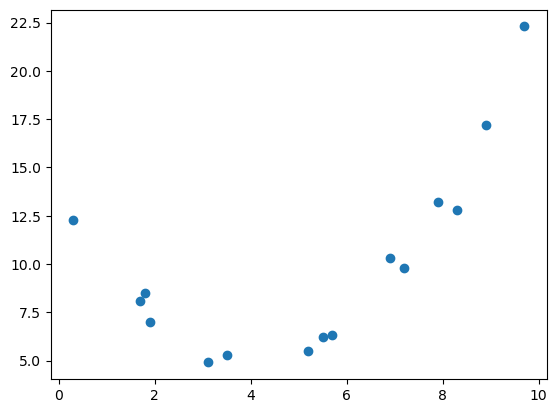

In [5]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y)

plt.show(fig)

## Linear regression in python

In python, linear regression is implemented by the `linregress()` function in the `scipy.stats` submodule of the third-party python module `scipy` (generally, scipy has a collection of tools for scientific computing and numerical calculations, and is built on top of numpy). 

Since we'll use only this specific function from the `scipy.stats`, we will import it directly as:

In [6]:
from scipy.stats import linregress

Now, when we apply `linregress()` on the height and weight data above, we obtain:

In [7]:
wt_h = linregress(heights, weights)
print(wt_h)

LinregressResult(slope=np.float64(3.2126420454545452), intercept=np.float64(-441.57812500000006), rvalue=np.float64(0.9161407489976452), pvalue=np.float64(0.00019534135276194468), stderr=np.float64(0.4969862092877473), intercept_stderr=np.float64(80.95232605206309))


The `slope` and `intercept` attributes of `wt_h` has the meaning you'd expect. In other words, we found that the best fit line between `heights` (in cm) and `weights` (in kg) is:

> weight = 3.21 * height − 441

To draw the best-fitted line on the plot we already have, we need to generate a new data series using the slope and intercept. For our example,

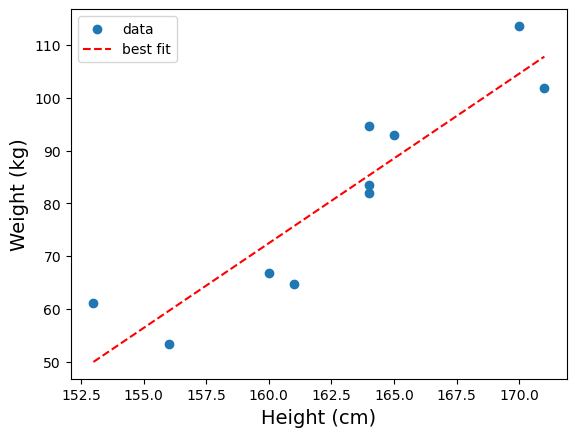

In [8]:
height_fit = np.array([ np.min(heights), np.max(heights) ])
weight_fit = wt_h.slope * height_fit + wt_h.intercept

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(heights, weights, label="data")
ax.set_xlabel("Height (cm)", fontsize=14)
ax.set_ylabel("Weight (kg)", fontsize=14)

ax.plot(height_fit, weight_fit, color="red", linestyle="--", label="best fit")

ax.legend()

plt.show(fig)

## Correlation coefficient $r$

The third value returned by `linregress()` is the **Pearson's correlation coefficient** $r$. It is a dimensionless number that tells us how strongly the two variables are related to each other. (We'll ignore the rest of the values return by `linregress()`, since these values are associated with inferential statistics and require more sophistication to interpret).

Mathematically, the Pearson's correlation coefficient is defined as:

$$ \operatorname{cor}(x, y) = \frac{
    \sum_i (x_i - \overline{x})(y_i - \overline{y})
}{\sqrt{
    \left(\sum_i (x_i - \overline{x})^2\right)\left(\sum_i (y_i - \overline{y})^2\right))
}}$$

In general, $r$ can takes any value between −1 and 1. If the association between $x$ and $y$ are negative (i.e., when the regression slope is negative), $r$ will be negative. Conversely, if the association is positive (positive slope), $r$ will be positive. Furthermore, the closer the value of $|r|$ is to 1, the stronger is the association.

The figure below illustrates various data with different level of correlation (you can download the data behind the plot [here](https://github.com/OCEAN-215-2025/preclass/tree/main/week_09/data/correlations.csv).):

![Correlations of various data](img/correlations.png)

As a rule of thumb, we may call correlation with $|r| < 0.3$ weak, $|r| > 0.7$ strong, and values in-between moderate. However, do note that *correlation is not causation*.

In the case of the height versus weight example, we have $r \approx 0.9$, so the association is strong and positive.

## Coefficient of determination $R^2$

In the specific case of linear regression, the square value of $r$ also has a nice interpretation. Recall that the (sample) variance of a variable $y$ is defined as:

$$ \sigma^2 = \frac{1}{n-1} \sum_i (y_i - \overline{y})^2 $$

Thus, let $\hat{y}_i = m x_i + c$ be the *predicted* value of $y_i$ based on the linear regression. We may say that the **variance explained by the regression** is:

$$ \sigma^2_\textrm{explained} = \frac{1}{n-1} \sum_i (\hat{y}_i - \overline{y})^2 $$

Similarly, we may define the **residual variance** to be:

$$ \sigma^2_\textrm{residual} = \frac{1}{n-1} \sum_i (y_i - \hat{y}_i)^2 $$

We may then define the portion of variance explained to be:

$$ \textrm{portion of variance explained} = \frac{\sigma^2_\textrm{explained}}{\sigma^2} = \ldots = 1 - \frac{\sigma^2_\textrm{residual}}{\sigma^2} \equiv R^2$$

where the derivation (the $= \ldots =$ part) rely on the fact that $m$ and $c$ are obtained from least square procedure. In this context, $R^2$ is known as the **coefficient of determination**.

For the specific case of linear regression, it turns out that $r^2 = R^2$. Thus, the square of `rvalue` can also be interpreted as the proportion of variance explained by the linear regression.

In the case of our height versus weight data, we have:

In [9]:
wt_h.rvalue**2

np.float64(0.8393138719739663)

Thus, about 84% of the weight variation is explained by the height variation.

## Linear regression on time series in python

Using `linregress()` on time series presents particular challenge in python because of the peculiarity of datetime representations in python. As an example, let's consider the time series of ocean surface temperature anomaly. The data came from [Copernicus Marine Service](https://marine.copernicus.eu/)'s [Global Ocean Sea Surface Temperature time series](https://marine.copernicus.eu/access-data/ocean-monitoring-indicators/global-ocean-sea-surface-temperature-time-series-and-trend). We convert this data into a csv format, which you can download from [here](https://github.com/OCEAN-215-2025/preclass/tree/main/week_09/data/ocean_surface_temp_1993-2021.csv).

To start, we load the csv file into pandas dataframe:

In [10]:
surf_temp = pd.read_csv("data/ocean_surface_temp_1993-2021.csv", parse_dates = ["time"])
surf_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         348 non-null    datetime64[ns]
 1   sst_anomaly  348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


Here is what the data looks like in a plot

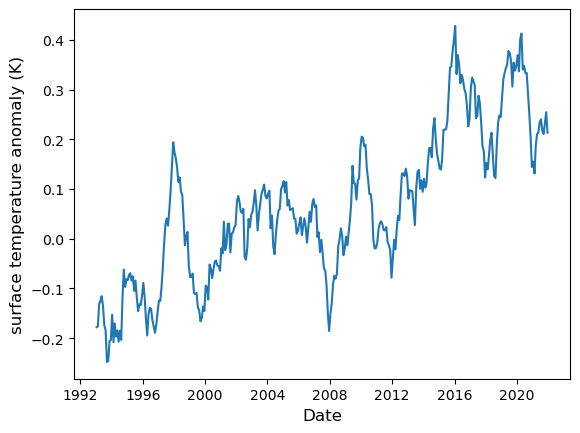

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(surf_temp["time"], surf_temp["sst_anomaly"])
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("surface temperature anomaly (K)", fontsize=12)

plt.show(fig)

If we attempt to perform linear regression as-is, we'll get an error:

In [12]:
linregress(surf_temp["time"].values, surf_temp["sst_anomaly"].values)

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

Internally, pandas datetimes is stored as a 64-bit integers. So one way to get around the problem is to explicityly cast the datetime values into integers, like so:

In [13]:
regress = linregress(surf_temp["time"].values.astype("int64"), surf_temp["sst_anomaly"].values)

Now the line runs without error but the fit results become quite hard to interpret:

In [14]:
print(regress)

LinregressResult(slope=np.float64(4.719764222235652e-19), intercept=np.float64(-0.4939024523218635), rvalue=np.float64(0.819954624538679), pvalue=np.float64(7.749079818621919e-86), stderr=np.float64(1.7713880082111528e-20), intercept_stderr=np.float64(0.021475751292749274))


Nevertheless, if we want to plot the best-fitted line all we have to do is to make sure we perform the same conversion in our "prediction" step:

In [15]:
date_range = pd.Series([surf_temp["time"].min(), surf_temp["time"].max()])

In [16]:
temp_range = date_range.astype("int64") * regress.slope + regress.intercept

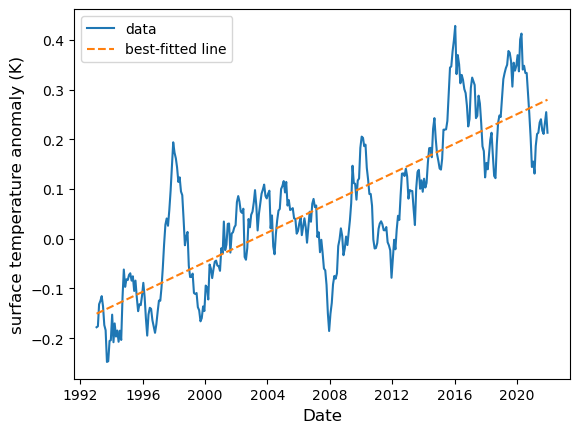

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(surf_temp["time"], surf_temp["sst_anomaly"], label="data")
ax.plot(date_range, temp_range, ls="--", label="best-fitted line")

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("surface temperature anomaly (K)", fontsize=12)

ax.legend()

plt.show(fig)

To express the slope in a more meaningful way, we note that in-principle the slope is just the temperature change divided by the date change. Doing this calculation naively again produce an error:

In [18]:
(temp_range[1] - temp_range[0]) / (date_range[1] - date_range[0])

TypeError: unsupported operand type(s) for /: 'numpy.float64' and 'Timedelta'

This time, the solution is to express the date change as (fractional) number of days. The object `(date_range[1] - date_range[0])` is a pandas `TimeDelta` object, which has a `.days` attribute (there are also `.hours` and `.minutes` attributes). So we can do:

In [19]:
slope_day = (temp_range[1] - temp_range[0]) / (date_range[1] - date_range[0]).days
print(slope_day)

4.077876288011604e-05


The slope above now has the more intuitive unit of K/day. Unfortunately, `TimeDelta` object does *not* have a `.year` attribute (because length of year is not uniform), but we can do the conversion ourselves to get the rate per year (note that in the Gregorian calendar a year is on average 365.2425 days):

In [20]:
slope_year = slope_day * 365.2425
print(slope_year)

0.014894137301240784


Thus the rate of ocean temperature increase is approximately 0.015 K per year.

One final remark: because correlation is dimensionless, the value we obtained from the linear regression is immediately usable. For example, the correlation of temperature anomaly with date is simply:

In [21]:
print(regress.rvalue)

0.819954624538679
